## Legends for panels

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# plt.rcParams['font.sans-serif'] = "Arial"
# plt.rcParams['font.family'] = "sans-serif"
# plt.rcParams['svg.fonttype'] = 'none'

## Functions

In [8]:
def print_tab20_hex_codes():
    # Get the tab20 colormap
    cmap = plt.get_cmap('tab20')
    
    # Extract the RGB values for all 20 colors
    n_colors = cmap.N  # Total number of colors
    colors = [cmap(i) for i in range(n_colors)]
    # Add Deep Purple and Pastel Purple to the list of colors to get a 22-color palette
    hex_codes = [mcolors.rgb2hex(color) for color in colors] + ["#800080", "#d28fd2"]
    
    return hex_codes

## Areas legends

In [ ]:
filename = "data/hcp.csv"
df = pd.read_csv(filename)

df.loc[df.name == 'V1', "area"] = "Primary Visual"
df.loc[df.name == 'V1', "area_id"] = -1
df["area_id"] += 1

df.loc[df.area_id > 4, "area_id"] += 3
df.area_id = df.area_id.replace({12+3: 5})
df.area_id = df.area_id.replace({13+3: 6})
df.area_id = df.area_id.replace({14+3: 7})
df.loc[df.area_id>14, "area_id"] = df[df.area_id>14]["area_id"] - 3
df['area_id'] = df['area_id'].replace({2: 3, 3:2, 4:5, 5:4}).replace({4:5, 5:4})

df.area = df.area.replace({"Early Visual": "Early Visual (V2-4)",
                           "IFG": "Inferior Frontal Gyrus",})

{k: "" for k in df.area.unique()}
areas = df.sort_values("area_id")["area"].drop_duplicates().tolist()

colors = print_tab20_hex_codes()

area_colors = {area: colors[i] for i, area in enumerate(areas)}

df["area_color"] = df["area"].map(area_colors)

assert df[["area_id", "area"]].drop_duplicates().sort_values("area_id").area_id.is_unique
#df.to_csv("hcp2.csv", index=False)

In [ ]:

fig, ax = plt.subplots()
handles = [
    plt.Line2D([0], [0], marker="o", color="w", label=area, markerfacecolor=color, markersize=10)
    for area, color in area_colors.items()
]

# Add padding to the legend
ax.legend(handles=handles, loc="center", ncol=2, fontsize=8, borderpad=1, title="Area")
ax.axis("off")
fig.tight_layout()
fig.savefig(
    "area_legend_with_title.svg", dpi=300, bbox_inches="tight", pad_inches=0, transparent=True
)
plt.close()

fig, ax = plt.subplots()
ax.legend(handles=handles, loc="center", ncol=2, fontsize=8, borderpad=1)
ax.axis("off")
fig.tight_layout()
fig.savefig("area_legend.svg", dpi=300, bbox_inches="tight", pad_inches=0, transparent=True)
plt.close()

## Cbar

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colorbar as cbar
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['svg.fonttype'] = 'none'

def plot_cbar(figsize=None, cmap="viridis", vmin=0, vmax=0.2, horizontal=False, title="", percent=True, locator=0.05, rotation=-90, labelpad=20, fontsize=12, **kwargs):

    if figsize is None:
        figsize = (6, 0.4) if horizontal else (0.4, 6)
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create a colormap normalization
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    
    # Create a scalar mappable for the colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Dummy array for ScalarMappable

    # Add the colorbar
    orientation = 'horizontal' if horizontal else 'vertical'
    cbar_instance = fig.colorbar(sm, cax=ax, orientation=orientation, **kwargs)
    cbar_instance.set_label(title, rotation=rotation, labelpad=labelpad, fontsize=fontsize)
    
    if percent:
        ticker = mticker.PercentFormatter(xmax=1, decimals=0)
        cbar_instance.formatter = ticker
    if locator:
        cbar_instance.locator = mticker.MultipleLocator(base=locator)

    
    return fig, ax

#fig, ax = plot_cbar(cmap="hot", title="CKA Similarity", vmin=0, vmax=0.18, locator=0.03, location='left', rotation=90, labelpad=10, figsize = (0.4, 6))
#fig.savefig("cbar_hot_0_18_rev.svg", dpi=300, bbox_inches="tight", transparent=True)

#fig, ax = plot_cbar(cmap="hot", title="CKA Similarity", vmin=0, vmax=0.18, locator=0.03, horizontal=True, rotation=0, labelpad=10, figsize = (6, 0.4))
#fig.savefig("cbar_hot_0_18_horizontal.svg", dpi=300, bbox_inches="tight", transparent=True)

In [ ]:
fig, ax = plot_cbar(cmap="hot", title="CKA Similarity", vmin=0, vmax=0.25, locator=0.05, horizontal=True, rotation=0, labelpad=10, figsize = (6, 0.3))
fig.savefig("cbar_hot_0_25_horizontal.svg", dpi=300, bbox_inches="tight", transparent=True)

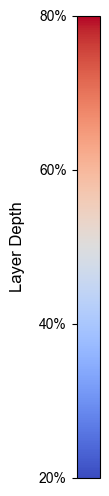

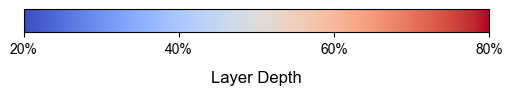

In [15]:
fig, ax = plot_cbar(cmap="coolwarm", title="Layer Depth", vmin=0.2, vmax=0.8, locator=0.2, location='left', rotation=90, labelpad=10, figsize = (0.3, 6))
fig.savefig("cbar_coolwarm_20_80_rev.svg", dpi=300, bbox_inches="tight", transparent=True)

fig, ax = plot_cbar(cmap="coolwarm", title="Layer Depth", vmin=0.2, vmax=0.8, locator=0.2, horizontal=True, rotation=0, labelpad=10, figsize = (6, 0.3))
fig.savefig("cbar_coolwarm_20_80_horizontal.svg", dpi=300, bbox_inches="tight", transparent=True)
